In [124]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
ticker = 'SYNT_2states'
features_path='/home/ak/Documents/Data/features_models/features/'

####paths####
labels_path = '/home/ak/Documents/Data/features_models/labels'
main_path = '/home/ak/Documents/Data/features_models/'

models_path=os.path.join(main_path,'models')
hmm_models_path = os.path.join(models_path,'hmm_models')
features_ticker_path = os.path.join(features_path, ticker)
predictions_path = os.path.join(main_path, 'predictions')
# ticker = 'SYNT_4states'

features_path = os.path.join(main_path, 'features')
ticker_labels_path = os.path.join(labels_path, ticker)
ticker_models_path = os.path.join(models_path, ticker)
ticker_predictions_path = os.path.join(predictions_path, ticker)

ticker_features_path = os.path.join(features_path, ticker)

###

# list of files    
labels_list = os.listdir(ticker_labels_path)

features_list = os.listdir(ticker_features_path)

In [15]:
labels=test.drop(columns=['ReturnTradedPrice','states','TradedTime','TradedPrice','ticker'])

In [19]:
labels=labels.drop(columns=['Duration'])

In [143]:
labels_pure_float

,label_simple_ep_abs__window_5__thres_historical_vol_ma__vol_pct_10.0,label_simple_ep_abs__window_2__thres_historical_vol_ma__vol_pct_10.0,label_simple_ep_abs__window_7__thres_historical_vol_ma__vol_pct_10.0,label_simple_ep_abs__window_9__thres_historical_vol_ma__vol_pct_5.0,label_simple_ep_abs__window_5__thres_historical_vol_ma__vol_pct_5.0,label_simple_ep_abs__window_5__thres_historical_vol_ma__vol_pct_15.0,label_simple_ep_abs__window_5__thres_historical_vol_ma__vol_pct_25.0,label_simple_ep_pct__window_5__thres_arbitrary__pct_10.0,label_simple_ep_pct__window_10__thres_arbitrary__pct_10.0,label_simple_ep_pct__window_15__thres_arbitrary__pct_5.0
0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,0.0
2,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,-1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
5,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0
6,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
7,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
8,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [109]:
summaries_date={}
summary_ratio={}
for no, _ in enumerate(labels_list):
    label_set = pd.read_csv(os.path.join(ticker_labels_path, labels_list[no]))
    labels_pure=label_set.drop(columns=['Duration','ReturnTradedPrice','states','TradedTime','TradedPrice','ticker'])
    labels_pure_float=labels_pure.astype(float)
    summary_float=labels_pure_float['label_simple_ep_abs__window_5__thres_historical_vol_ma__vol_pct_10.0'].astype(float)
    summary_label_2= labels_pure_float['label_simple_ep_abs__window_2__thres_historical_vol_ma__vol_pct_10.0 '].astype(float)
    summaries_date[os.path.splitext(labels_list[no])[0]]=summary_float.value_counts()
    
    

In [103]:
dates=summaries_date.keys()
summaries_date[dates[0]][-1]/summaries_date[dates[0]][1]

1

In [113]:
df_all=pd.DataFrame(summaries_date)
df_all

,20170601,20170602,20170605,20170606,20170607,20170608,20170609,20170612,20170613,20170614,...,20180712,20180713,20180716,20180717,20180718,20180719,20180720,20180723,20180724,20180725
-1.0,NaN,2181,2191,2165,2357,2449,2300,2360,2312,2455,...,2450,2443,2206,2375,1697,2420,2389,1439,2218,2397
0.0,4996.0,728,641,820,337,265,316,392,314,71,...,202,109,733,293,1814,76,154,2370,582,142
1.0,NaN,2087,2164,2011,2302,2282,2380,2244,2370,2470,...,2344,2444,2057,2328,1485,2500,2453,1187,2196,2457


In [148]:
down_up_ratio=df_all.iloc[0].dropna()/df_all.iloc[2].dropna()
total_labels=df_all.iloc[0].dropna()+df_all.iloc[2].dropna()
total_labels.describe()

count     299.000000
mean     4249.404682
std       822.490844
min       494.000000
25%      3966.000000
50%      4600.000000
75%      4816.500000
max      4954.000000
dtype: float64

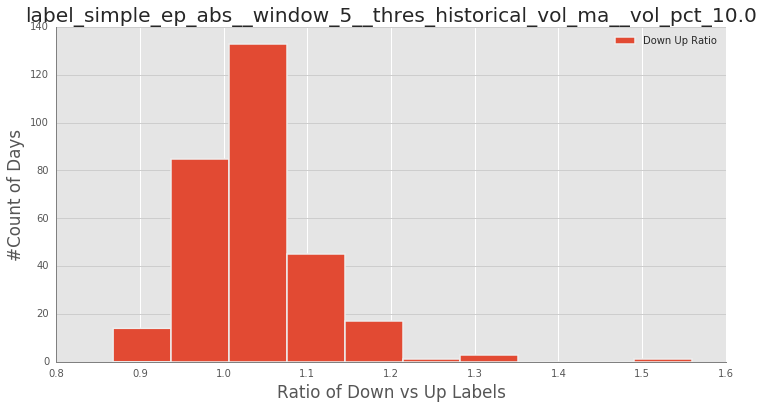

In [142]:
plt.rc('font', family='Helvetica', size=14)
# To later reset to default font settings: plt.rcdefaults()
x_values=down_up_ratio.values

fig = plt.figure(figsize=(12, 6))
ax = plt.subplot()
plt.hist(
    x_values, 
    lw=1.5,
    label='Down Up Ratio'
)

# plt.plot(
#     x_values, coal,
#     lw=1.5,
#     label='Coal generation'
# )

legend = plt.legend()
legend.draw_frame(False)

plt.xlim(0.8, 1.6)
plt.ylim(0, 140)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

ax.yaxis.grid(True, which='major', color='#CDCDCD', linestyle='-')
plt.title('label_simple_ep_abs__window_5__thres_historical_vol_ma__vol_pct_10.0')
plt.xlabel('Ratio of Down vs Up Labels')
plt.ylabel('#Count of Days')
